Columns in CSV:
Index(['pl_name', 'hostname', 'sy_snum', 'sy_pnum', 'discoverymethod',
       'disc_year', 'disc_facility', 'pl_controv_flag', 'pl_orbper',
       'pl_orbpererr1', 'pl_orbpererr2', 'pl_orbperlim', 'pl_orbsmax',
       'pl_orbsmaxerr1', 'pl_orbsmaxerr2', 'pl_orbsmaxlim', 'pl_rade',
       'pl_radeerr1', 'pl_radeerr2', 'pl_radelim', 'pl_radj', 'pl_radjerr1',
       'pl_radjerr2', 'pl_radjlim', 'pl_bmasse', 'pl_bmasseerr1',
       'pl_bmasseerr2', 'pl_bmasselim', 'pl_bmassj', 'pl_bmassjerr1',
       'pl_bmassjerr2', 'pl_bmassjlim', 'pl_bmassprov', 'pl_orbeccen',
       'pl_orbeccenerr1', 'pl_orbeccenerr2', 'pl_orbeccenlim', 'pl_insol',
       'pl_insolerr1', 'pl_insolerr2', 'pl_insollim', 'pl_eqt', 'pl_eqterr1',
       'pl_eqterr2', 'pl_eqtlim', 'ttv_flag', 'st_spectype', 'st_teff',
       'st_tefferr1', 'st_tefferr2', 'st_tefflim', 'st_rad', 'st_raderr1',
       'st_raderr2', 'st_radlim', 'st_mass', 'st_masserr1', 'st_masserr2',
       'st_masslim', 'st_met', 'st_meterr1'

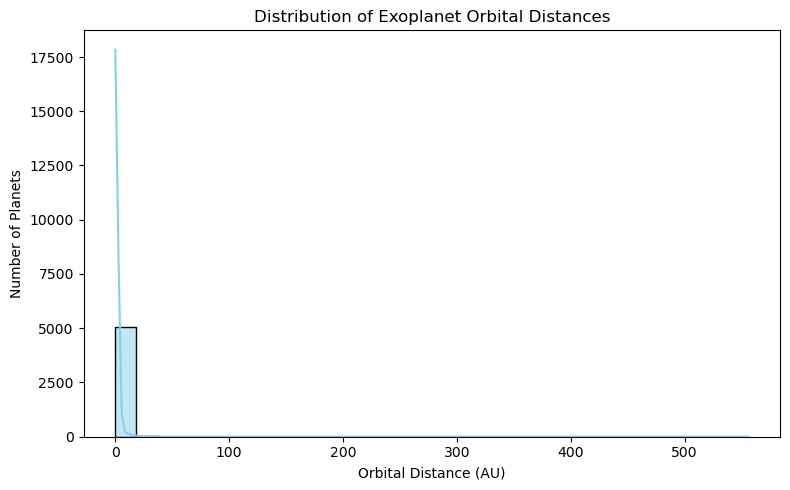

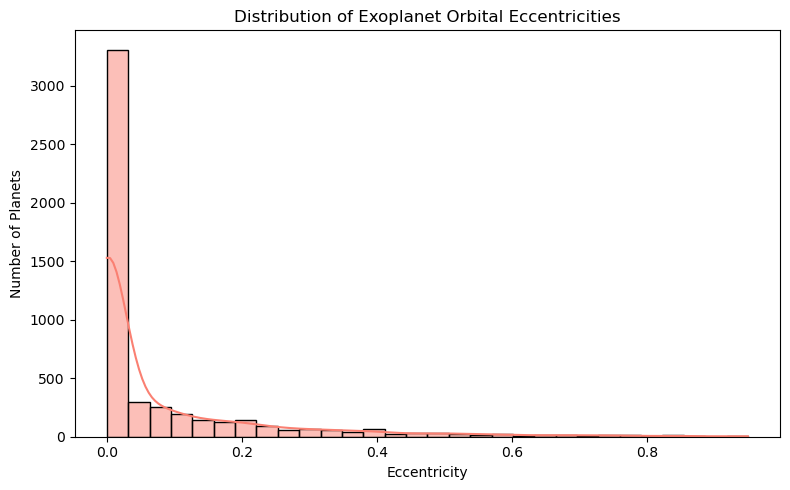

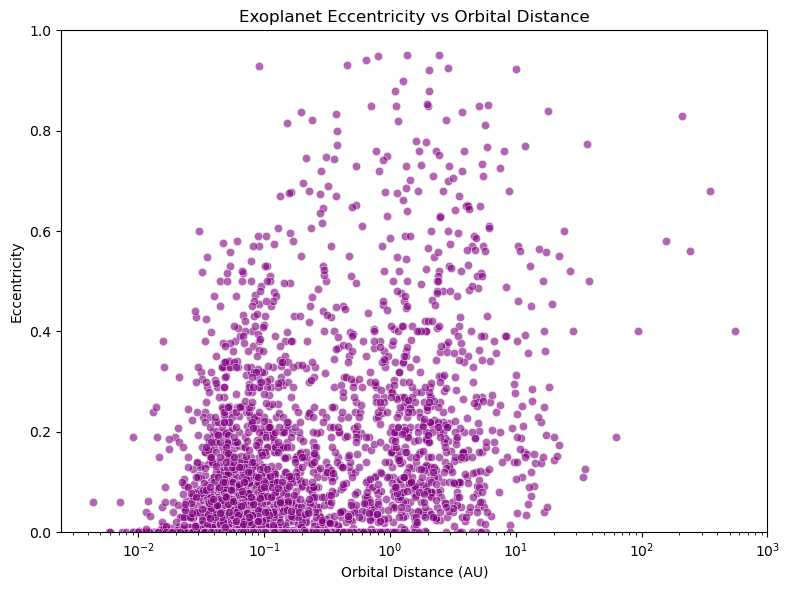

In [1]:
# Exoplanet Orbits and Eccentricities Analysis

# Step 1: Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 2: Load CSV safely, skipping metadata lines starting with '#'
with open("exoplanetdata.csv") as f:
    lines = f.readlines()

# Find the line where actual header starts (first line not starting with '#' or empty)
for i, line in enumerate(lines):
    if not line.startswith("#") and line.strip():
        header_line_index = i
        break

# Load CSV from header line
df = pd.read_csv("exoplanetdata.csv", skiprows=header_line_index)

# Strip column names of extra spaces
df.columns = [c.strip() for c in df.columns]

# Step 3: Check columns
print("Columns in CSV:")
print(df.columns)

# Step 4: Keep only rows with orbital distance and eccentricity
required_cols = ['pl_orbsmax', 'pl_orbeccen']
df_plot = df.dropna(subset=required_cols)

# Step 5: Histogram of orbital distances
plt.figure(figsize=(8,5))
sns.histplot(df_plot['pl_orbsmax'], bins=30, kde=True, color='skyblue')
plt.xlabel("Orbital Distance (AU)")
plt.ylabel("Number of Planets")
plt.title("Distribution of Exoplanet Orbital Distances")
plt.tight_layout()
plt.show()

# Step 6: Histogram of eccentricities
plt.figure(figsize=(8,5))
sns.histplot(df_plot['pl_orbeccen'], bins=30, kde=True, color='salmon')
plt.xlabel("Eccentricity")
plt.ylabel("Number of Planets")
plt.title("Distribution of Exoplanet Orbital Eccentricities")
plt.tight_layout()
plt.show()

# Step 7: Scatter plot of eccentricity vs orbital distance
plt.figure(figsize=(8,6))
sns.scatterplot(x='pl_orbsmax', y='pl_orbeccen', data=df_plot, color='purple', alpha=0.6)
plt.xlabel("Orbital Distance (AU)")
plt.ylabel("Eccentricity")
plt.title("Exoplanet Eccentricity vs Orbital Distance")
plt.xscale('log')  # Optional: log scale for better visualization
plt.ylim(0, 1)
plt.tight_layout()
plt.show()
